Tutorial - Part #3 - Advanced SingleImage
=======================

In this tutorial a more advanced set of examples are presented on SingleImage class,
which allows tod do more specific tasks with the instances.

We import the packages, and also a pair of sample images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.visualization import LinearStretch, LogStretch, ZScaleInterval, MinMaxInterval, ImageNormalize

In [3]:
import properimage.single_image as si

In [4]:
img_path = './../../../data/aligned_eso085-030-004.fit'

In [5]:
img = si.SingleImage(img_path)

Sources found = 114
stamps will be 13 x 13


Quickly we get the answer for the number of sources *a priori* we would use and the *estimated* size of thw PSF cutout stamp.

If we want to know the different properties assigned to this instance we can enumerate them:

* The origin of the information:

In [6]:
print(img.attached_to)

./../../../data/aligned_eso085-030-004.fit


* The header if a fits file

In [7]:
img.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                  682                                                  
DATE-OBS= '2015-12-27T06:26:24' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   60.000000000000000 /Exposure time in seconds                        
EXPOSURE=   60.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.091654000000002 /CCD temperature at start of exposure in C       
XPIXSZ  =   27.000000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   27.000000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   

* The pixel data

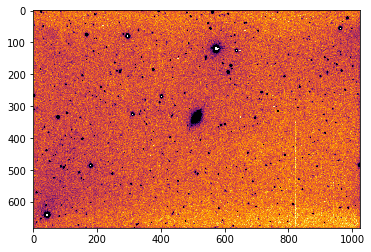

In [8]:
norm = ImageNormalize(img.pixeldata, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.imshow(img.pixeldata, cmap='inferno_r', norm=norm)

* The mask inferred or setted

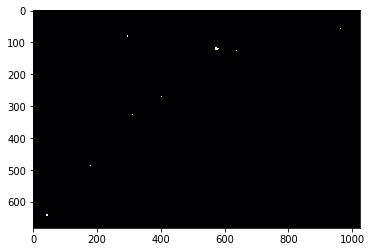

In [9]:
plt.imshow(img.mask, cmap='inferno')

* The background calculated

Background level = 8140.66210938, rms = 73.2535018921


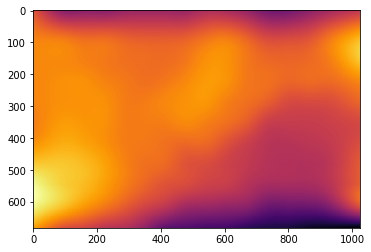

In [10]:
plt.imshow(img.background, cmap='inferno')

As the background is being estimated only if accesed, then it prints the results. 

* The background subtracted image

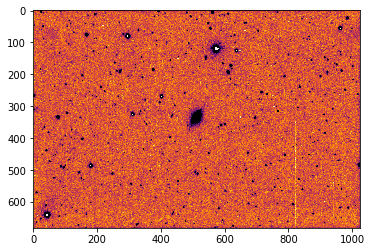

In [11]:
norm = ImageNormalize(img.bkg_sub_img, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.imshow(img.bkg_sub_img, cmap='inferno_r', norm=norm)

* The stamp_shape to use (this is the final figure, after some exploring of the stars chosen)

In [12]:
print(img.stamp_shape)

(13, 13)


* Get the stamp positions is also possible

In [13]:
print(img.stamps_pos[0:10])

('Masked pixels: ', 175)
[[  4.00943722  25.2612925 ]
 [  7.14687054 480.90913039]
 [ 11.7277283  610.83903619]
 [ 41.55364391 548.48252228]
 [ 45.46764192 189.18898914]
 [ 50.58756507  31.5412276 ]
 [ 63.55835596 329.98388163]
 [103.31301235 487.26954846]
 [128.46700655 189.50986135]
 [134.19680907  83.34610259]]


* Obtaining the best sources was explained in Tutorial 01, but here we show it again just to be complete

In [14]:
print(img.best_sources[0:10][['x', 'y', 'cflux']])

[( 25.2612925 ,   4.00943722, 53945.6953125 )
 (480.90913039,   7.14687054, 24435.09375   )
 (610.83903619,  11.7277283 , 40934.80078125)
 (548.48252228,  41.55364391, 48257.42578125)
 (189.18898914,  45.46764192,  8198.62304688)
 ( 31.5412276 ,  50.58756507, 22010.40234375)
 (329.98388163,  63.55835596, 12863.87890625)
 (487.26954846, 103.31301235, 17901.34765625)
 (189.50986135, 128.46700655, 14366.90429688)
 ( 83.34610259, 134.19680907, 11509.91699219)]


* We can get the final number of sources used in PSF estimation

In [15]:
print(img.n_sources)

69


* We can also print the covariance matrix from these objects

In [16]:
print(img.cov_matrix)

[[5.80843689e-06 3.67886428e-06 1.00944156e-05 ... 4.96023258e-06
  6.17917623e-06 5.86208953e-06]
 [3.67886428e-06 3.00746851e-06 7.40460411e-06 ... 3.56739356e-06
  4.36598189e-06 3.94612223e-06]
 [1.00944156e-05 7.40460411e-06 2.15220773e-05 ... 9.34219282e-06
  1.29907629e-05 1.14999715e-05]
 ...
 [4.96023258e-06 3.56739356e-06 9.34219282e-06 ... 5.71831627e-06
  5.38405645e-06 5.32218466e-06]
 [6.17917623e-06 4.36598189e-06 1.29907629e-05 ... 5.38405645e-06
  9.15291188e-06 7.46465122e-06]
 [5.86208953e-06 3.94612223e-06 1.14999715e-05 ... 5.32218466e-06
  7.46465122e-06 7.63719290e-06]]


* As showed from Tutorial 02 we can get the PSF, depending on our level of approximation needed

In [17]:
a_fields, psf_basis = img.get_variable_psf(inf_loss=0.01)

In [18]:
print(len(psf_basis), len(a_fields))

(38, 38)


Check the information loss argument, which states the maximum amount of information lost in the basis expansion.
If we change it the basis is updated:

In [19]:
a_fields, psf_basis = img.get_variable_psf(inf_loss=0.05)
print(len(psf_basis), len(a_fields))

(3, 3)


Of course the elements of the basis are unchanged, only a subset is returned. So going from small `inf_loss` to bigger values is the same as choosing less elements in the calculated basis.

Once obtained this basis and coefficient fields we can display them using some of the `plot` module functionalities:

In [20]:
from properimage.plot import plot_afields, plot_psfbasis

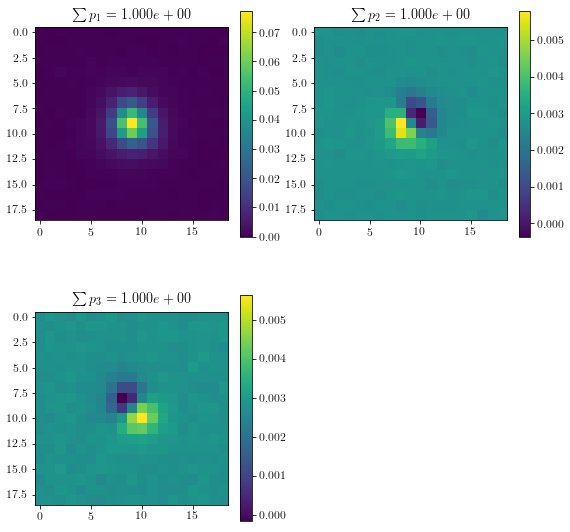

In [21]:
plot_psfbasis(psf_basis=psf_basis, nbook=True)

For the `a_fields` object we need to give the coordinates where we evaluate this coefficients.
A function is provided, inside `img` instance object.

In [22]:
x, y = img.get_afield_domain()

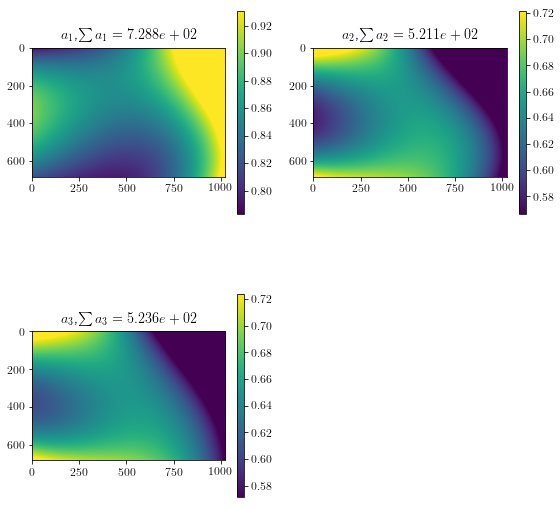

In [23]:
plot_afields(a_fields=a_fields, x=x, y=y, nbook=True)

* The instance is capable of calculating its own $S$ component (Zackay et al. 2016 notation)

In [24]:
S = img.s_component

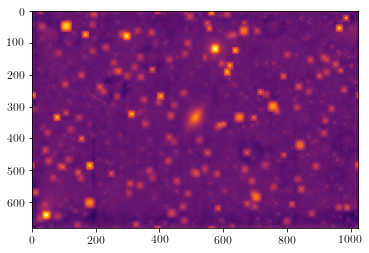

In [25]:
norm = ImageNormalize(S, interval=MinMaxInterval(),
                      stretch=LogStretch())

plt.imshow(S, cmap='inferno', norm=norm)